<h1 style="text-align: center;">CNY-LKR Currency Exchange Prediction</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Original Datasets/CNY_Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/09/2024,41.37,41.57,41.59,41.34,NaN,-0.48%
1,05/08/2024,41.57,41.52,41.60,41.52,NaN,0.10%
2,05/07/2024,41.52,41.19,41.54,41.13,NaN,0.46%
3,05/06/2024,41.33,41.22,41.45,41.17,NaN,0.78%
4,05/03/2024,41.01,41.00,41.06,40.99,NaN,0.03%
...,...,...,...,...,...,...,...
3738,01/07/2010,16.75,16.75,16.75,16.73,NaN,0.00%
3739,01/06/2010,16.75,16.74,16.80,16.73,NaN,0.05%
3740,01/05/2010,16.74,16.76,16.76,16.74,NaN,-0.15%
3741,01/04/2010,16.76,16.75,16.77,16.75,NaN,0.09%


In [4]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %     object
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %            object
dtype: object

In [6]:
df.drop(columns=['Vol.'], inplace=True)
df

,Date,Price,Open,High,Low,Change %
0,2024-05-09,41.37,41.57,41.59,41.34,-0.48%
1,2024-05-08,41.57,41.52,41.60,41.52,0.10%
2,2024-05-07,41.52,41.19,41.54,41.13,0.46%
3,2024-05-06,41.33,41.22,41.45,41.17,0.78%
4,2024-05-03,41.01,41.00,41.06,40.99,0.03%
...,...,...,...,...,...,...
3738,2010-01-07,16.75,16.75,16.75,16.73,0.00%
3739,2010-01-06,16.75,16.74,16.80,16.73,0.05%
3740,2010-01-05,16.74,16.76,16.76,16.74,-0.15%
3741,2010-01-04,16.76,16.75,16.77,16.75,0.09%


In [7]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

## Visualizations

### 1. Date against Parameters

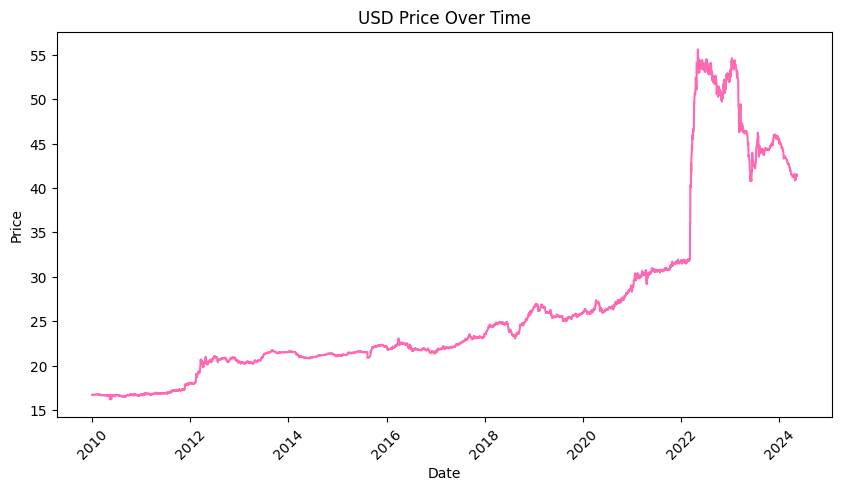

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Price"], color='hotpink')
plt.title("USD Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

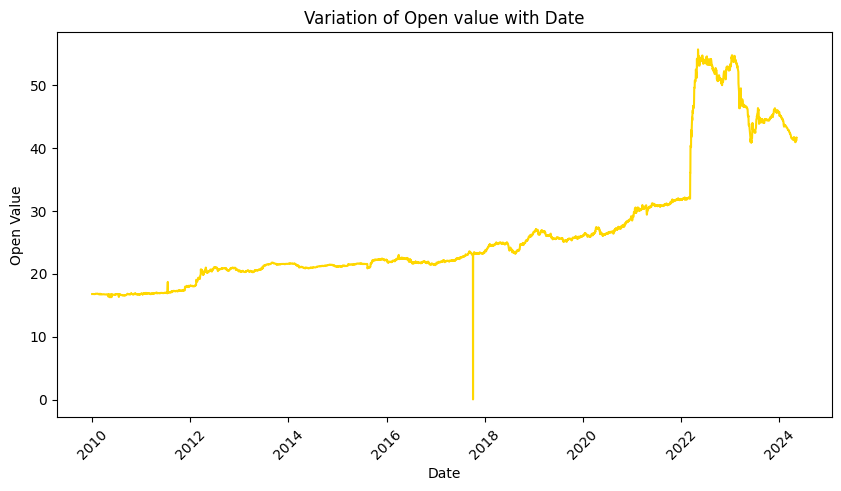

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Open"], color='gold')
plt.title("Variation of Open value with Date")
plt.xlabel("Date")
plt.ylabel("Open Value")
plt.xticks(rotation=45)
plt.show()

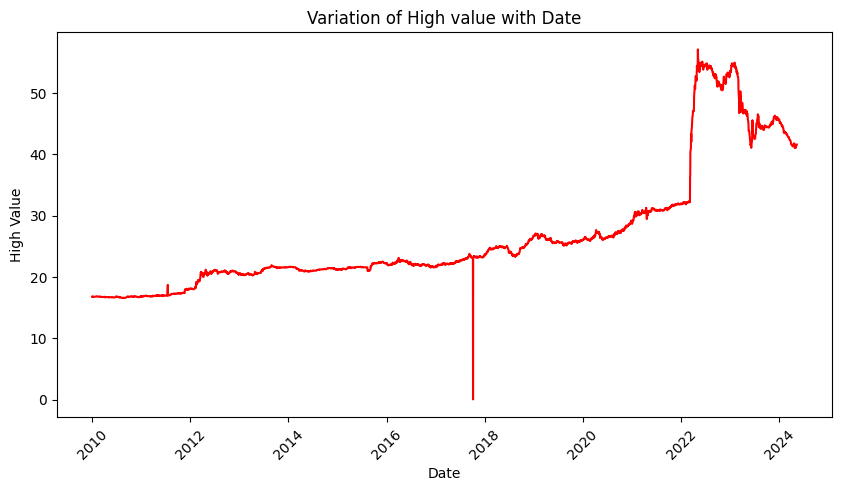

In [10]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["High"], color='red')
plt.title("Variation of High value with Date")
plt.xlabel("Date")
plt.ylabel("High Value")
plt.xticks(rotation=45)
plt.show()

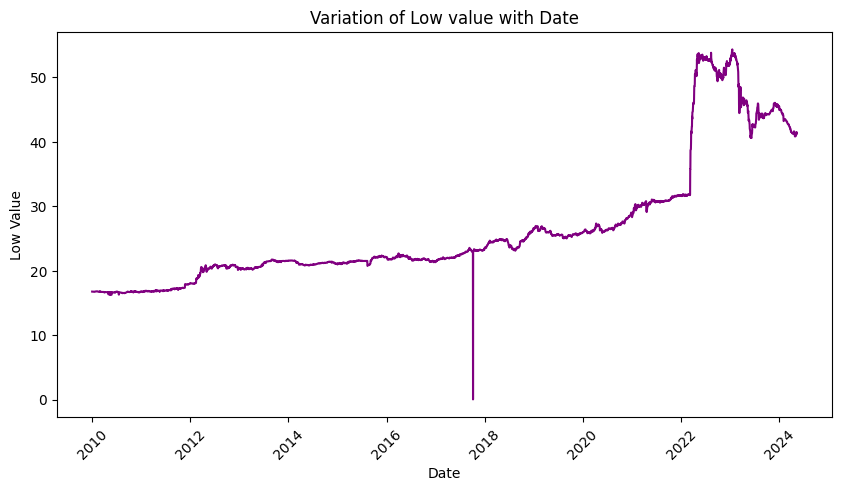

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Low"], color='purple')
plt.title("Variation of Low value with Date")
plt.xlabel("Date")
plt.ylabel("Low Value")
plt.xticks(rotation=45)
plt.show()

### 2. Price against Parameters

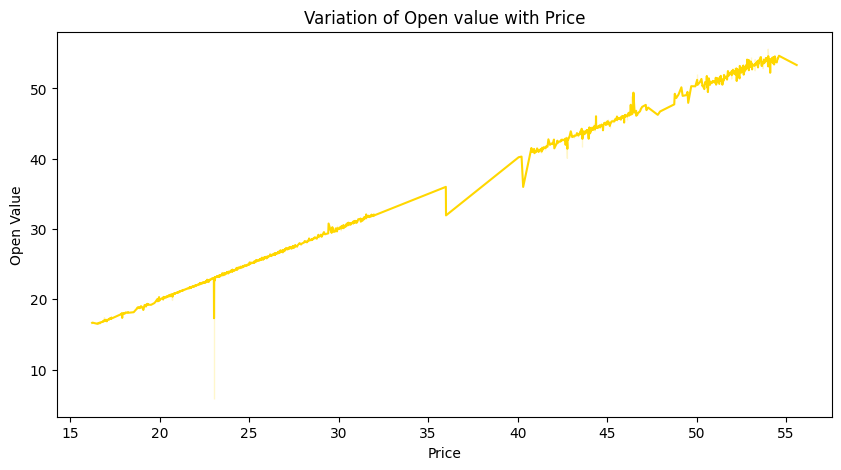

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["Open"], color='gold')
plt.title("Variation of Open value with Price")
plt.xlabel("Price")
plt.ylabel("Open Value")
plt.show()

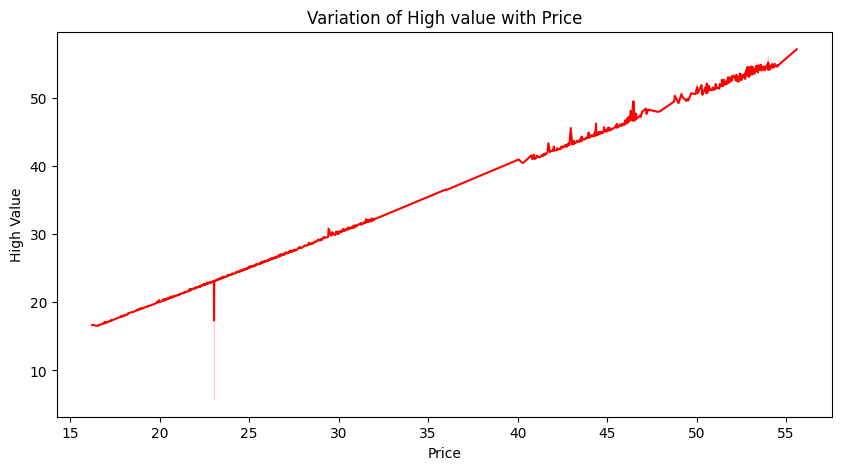

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["High"], color='red')
plt.title("Variation of High value with Price")
plt.xlabel("Price")
plt.ylabel("High Value")
plt.show()

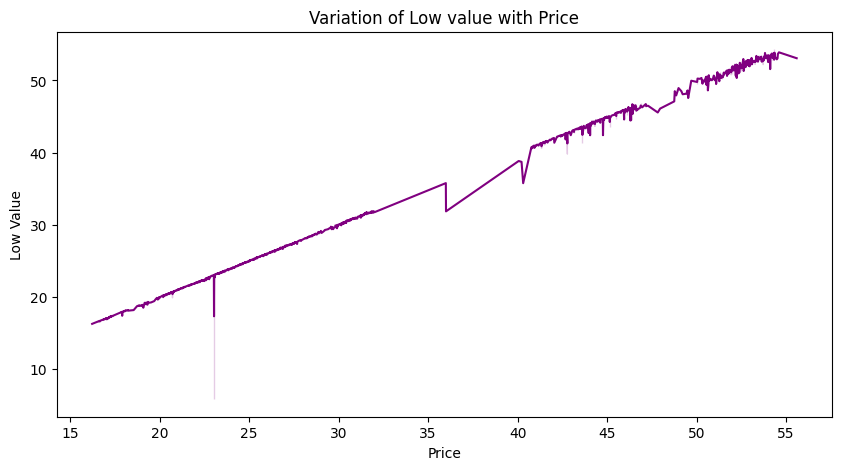

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["Low"], color='purple')
plt.title("Variation of Low value with Price")
plt.xlabel("Price")
plt.ylabel("Low Value")
plt.show()

## Model Synthesis

In [15]:
df.drop(columns=["Open", "High", "Low", "Change %"], inplace=True)
df

,Date,Price
0,2024-05-09,41.37
1,2024-05-08,41.57
2,2024-05-07,41.52
3,2024-05-06,41.33
4,2024-05-03,41.01
...,...,...
3738,2010-01-07,16.75
3739,2010-01-06,16.75
3740,2010-01-05,16.74
3741,2010-01-04,16.76


In [16]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 1. ARIMA Model

3 1 0
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2994
Model:                 ARIMA(3, 1, 0)   Log Likelihood                  96.399
Date:                Fri, 10 May 2024   AIC                           -184.799
Time:                        18:29:05   BIC                           -160.783
Sample:                             0   HQIC                          -176.159
                               - 2994                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1257      0.007    -18.521      0.000      -0.139      -0.112
ar.L2          0.1632      0.004     41.406      0.000       0.155       0.171
ar.L3          0.1837      0.005     36.484   

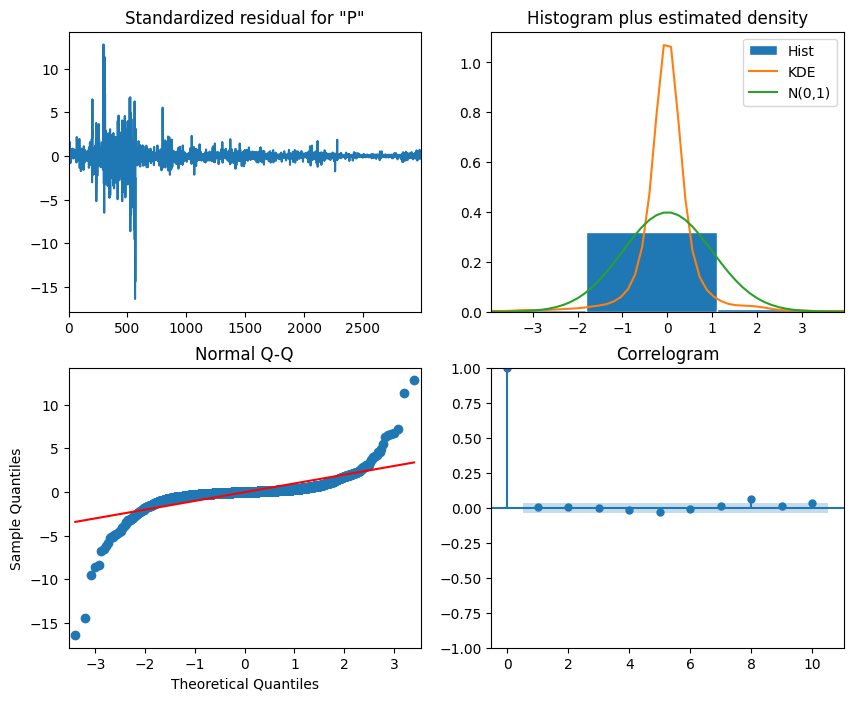

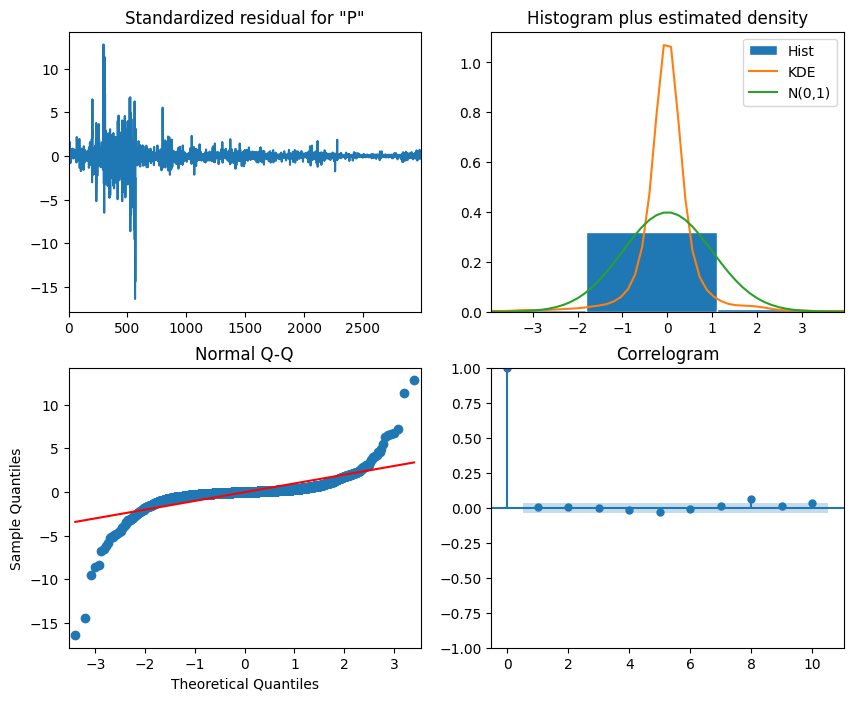

In [17]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df)*0.8)
train_col, test_col = df.iloc[:train_size], df.iloc[train_size:]

auto_arima_model = auto_arima(train_col['Price'], seasonal=False, trace=False)
p,d,q = auto_arima_model.order
print(p,d,q)
arima_model = ARIMA(train_col['Price'], order=(p,d,q))
arima_model = arima_model.fit()
print(arima_model.summary())
arima_model.plot_diagnostics(figsize=(10,8))

In [18]:
arima_testing_predictions = arima_model.forecast(steps=len(test_col))
mse = mean_squared_error(test_col['Price'], arima_testing_predictions)
mae = mean_absolute_error(test_col['Price'], arima_testing_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error for the ARIMA model is {mse}")
print(f"Mean Absolute Error for the ARIMA model is {mae}")
print(f"Root Mean Sqaured Error for the ARIMA model is {rmse}")

Mean Squared Error for the ARIMA model is 11.409520269766615
Mean Absolute Error for the ARIMA model is 2.972830003920433
Root Mean Sqaured Error for the ARIMA model is 3.3777981392863925


### 2. SARIMAX Model

3 1 0
                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 2994
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 12)   Log Likelihood                -232.064
Date:                            Fri, 10 May 2024   AIC                            478.128
Time:                                    18:29:09   BIC                            520.128
Sample:                                         0   HQIC                           493.240
                                           - 2994                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1233      0.007    -16.907      0.000      -0.138      -0.109
ar.L2          0.1311      0.

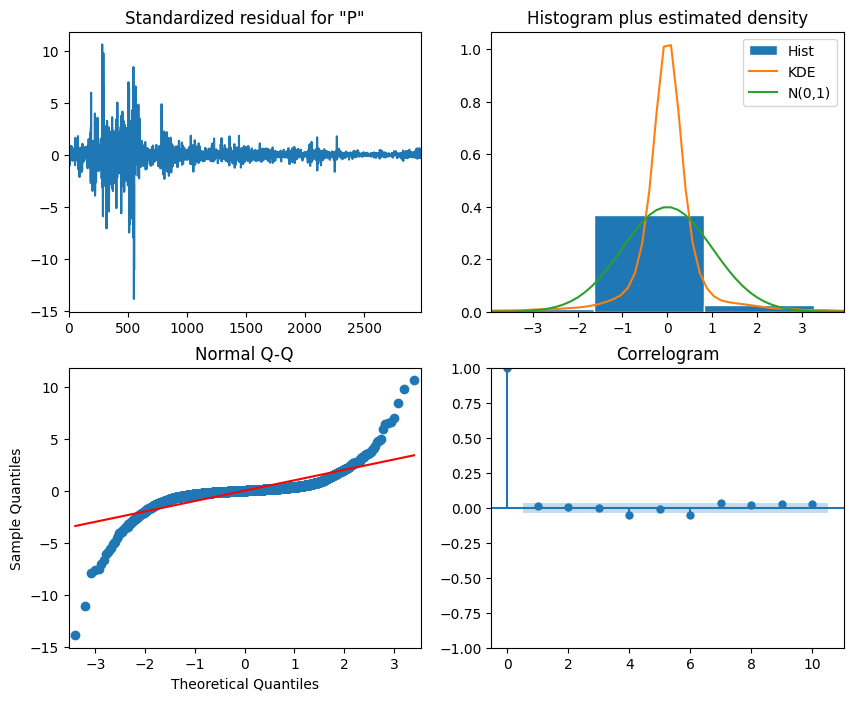

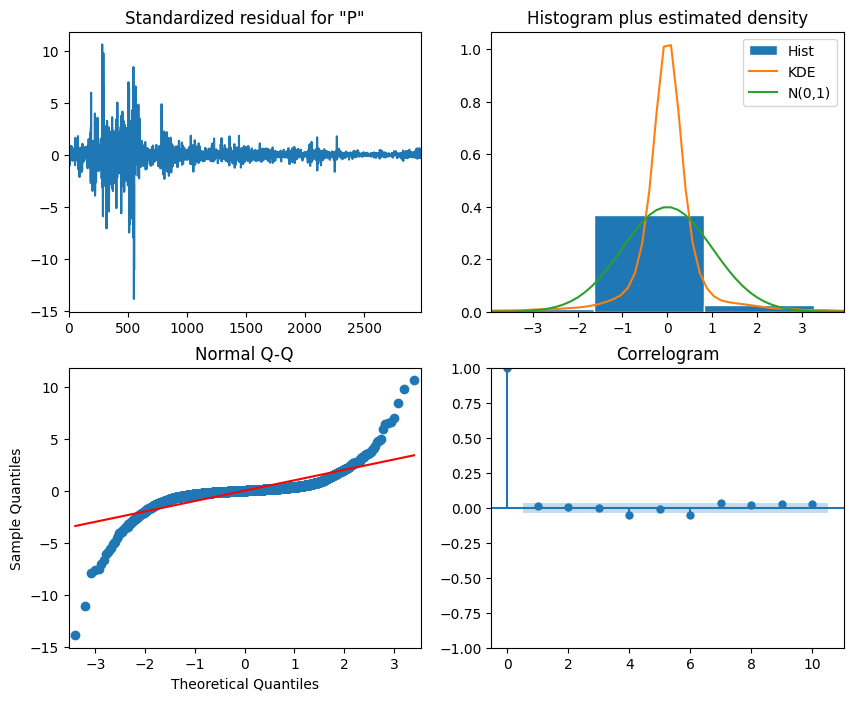

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df)*0.8)
train_col, test_col = df.iloc[:train_size], df.iloc[train_size:]

print(p,d,q)
sarimax_model = SARIMAX(train_col['Price'], order=(p,d,q), seasonal_order=(p,d,q,12))
sarimax_model = sarimax_model.fit()
print(sarimax_model.summary())
sarimax_model.plot_diagnostics(figsize=(10,8))

In [20]:
sarimax_testing_predictions = sarimax_model.forecast(steps=len(test_col))
mse = mean_squared_error(test_col['Price'], sarimax_testing_predictions)
mae = mean_absolute_error(test_col['Price'], sarimax_testing_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error for the SARIMAX model is {mse}")
print(f"Mean Absolute Error for the SARIMAX model is {mae}")
print(f"Root Mean Sqaured Error for the SARIMAX model is {rmse}")

Mean Squared Error for the SARIMAX model is 74.00206735309541
Mean Absolute Error for the SARIMAX model is 7.5519666339281715
Root Mean Sqaured Error for the SARIMAX model is 8.602445428661284


### 3. LSTM Model

In [23]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

scaler = MinMaxScaler(feature_range=(0,1))
df["Price"] = scaler.fit_transform(df["Price"].values.reshape(-1, 1))

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

sequence_length = 10
x_train = create_sequences(train['Price'], sequence_length)
x_test = create_sequences(test['Price'], sequence_length)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

print(lstm_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm_model.fit(x_train, train['Price'][sequence_length:], epochs=100, batch_size=32)

# evaluating the model
loss = lstm_model.evaluate(x_test, test['Price'][sequence_length:])

# predicting the values
lstm_predictions = lstm_model.predict(x_test)

# getting the actual values using inverse transformation
lstm_predictions_actual = scaler.inverse_transform(lstm_predictions)

lstm_actual_vals = scaler.inverse_transform(test["Price"][sequence_length:].values.reshape(-1, 1))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(lstm_actual_vals, lstm_predictions_actual)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(lstm_actual_vals, lstm_predictions_actual)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error for LSTM model is {mae}")
print(f"Mean Squared Error for LSTM model is {mse}")
print(f"Root Mean Squared Error for LSTM model is {rmse}")

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0367
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8122e-04
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5963e-04
Epoch 13/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1727e-04
Epoch 14/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011
Epoch 15/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

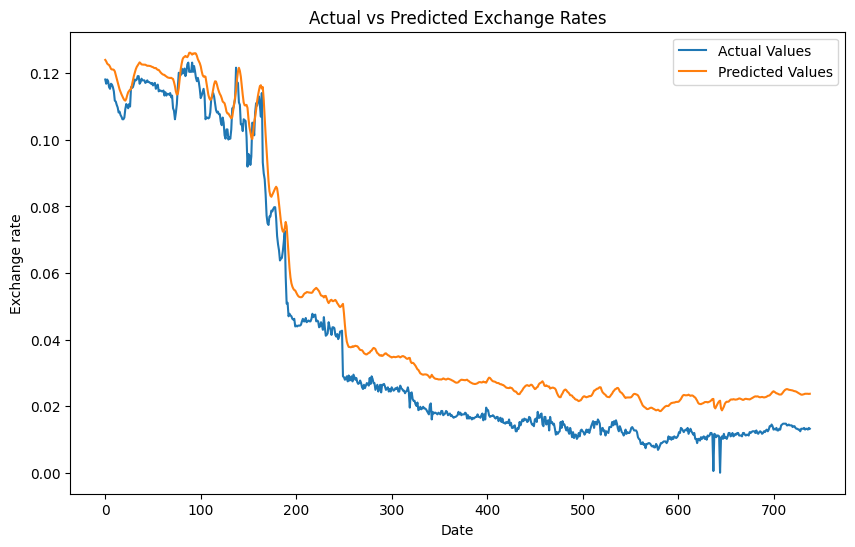

In [26]:
# plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(lstm_actual_vals, label='Actual Values')
plt.plot(lstm_predictions_actual, label='Predicted Values')
plt.title('Actual vs Predicted Exchange Rates')
plt.xlabel("Date")
plt.ylabel("Exchange rate")
plt.legend()
plt.show()

### Saving the best model

In [27]:
directory = "Models"

if not os.path.exists(directory):
    os.makedirs(directory)

lstm_model.save("Models/CNY_Model.keras")

## Analysis

Once again the LSTM model proves to be the best model for this purpose.